In [28]:
library(ggplot2)
library(class)

In [29]:
Dataset <- read.csv("/Users/Amardeep/Documents/Semester_2/Dic/lab_3/NHLTop100.csv")
head(Dataset)

Rank,Player,Team,Pos,X1st.NHL.Season,Last.NHL.Season,GP,G,A,P,X...,PIM,PP,SH,GW,GT,OT,Shots
1,Wayne Gretzky,,C,1979-1980,1998-1999,1487,894,1963,2857,518,577,204,73,91,12,1,5089
2,Mark Messier,,C,1979-1980,2003-2004,1756,694,1193,1887,210,1910,179,63,92,15,7,4219
3,Gordie Howe,,R,1946-1947,1979-1980,1767,801,1049,1850,87,1685,39,5,18,NA,NA,NA
4,Ron Francis,,C,1981-1982,2003-2004,1731,549,1249,1798,-10,979,188,12,79,13,3,3754
5,Marcel Dionne,,C,1971-1972,1988-1989,1348,731,1040,1771,28,600,234,19,74,1,2,5366
6,Steve Yzerman,,C,1983-1984,2005-2006,1514,692,1063,1755,202,924,202,50,94,12,8,4602


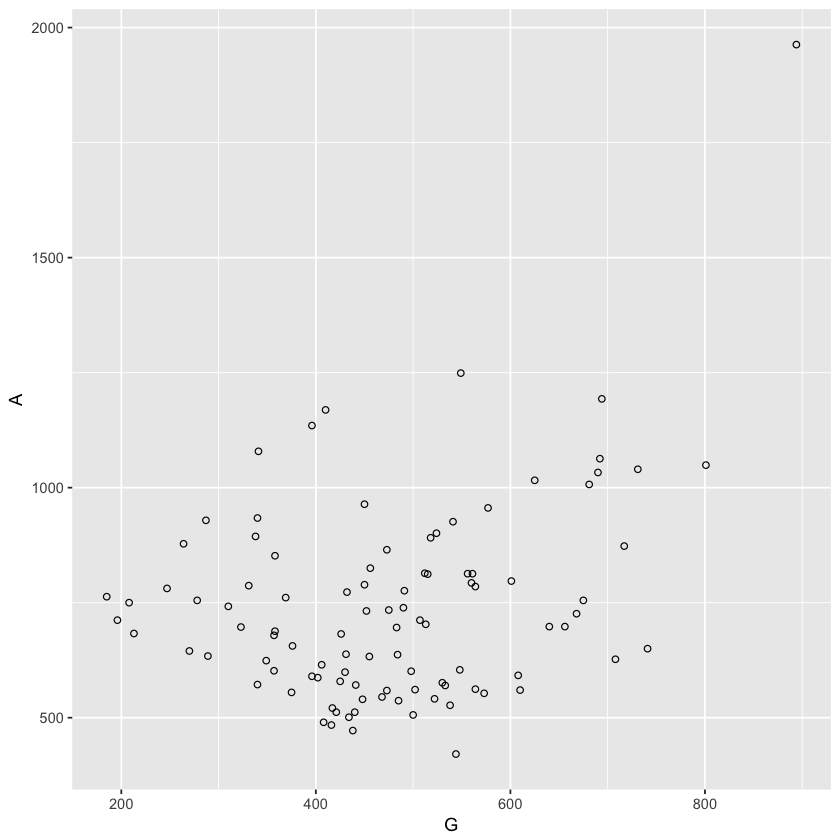

In [30]:
# plot(A ~ G, data=Dataset, main="NHL")
ggplot(Dataset, aes(x=G, y=A)) + geom_point(shape=1) 

# Building and plotting the Linear Regression Model

In [31]:
model = lm(formula = A ~ G, data = Dataset)
summary(model)


Call:
lm(formula = A ~ G, data = Dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-356.51 -158.59  -10.29  125.08 1003.42 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 494.5135    74.6410   6.625 1.88e-09 ***
G             0.5202     0.1508   3.449 0.000832 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 207 on 98 degrees of freedom
Multiple R-squared:  0.1082,	Adjusted R-squared:  0.09913 
F-statistic: 11.89 on 1 and 98 DF,  p-value: 0.0008317


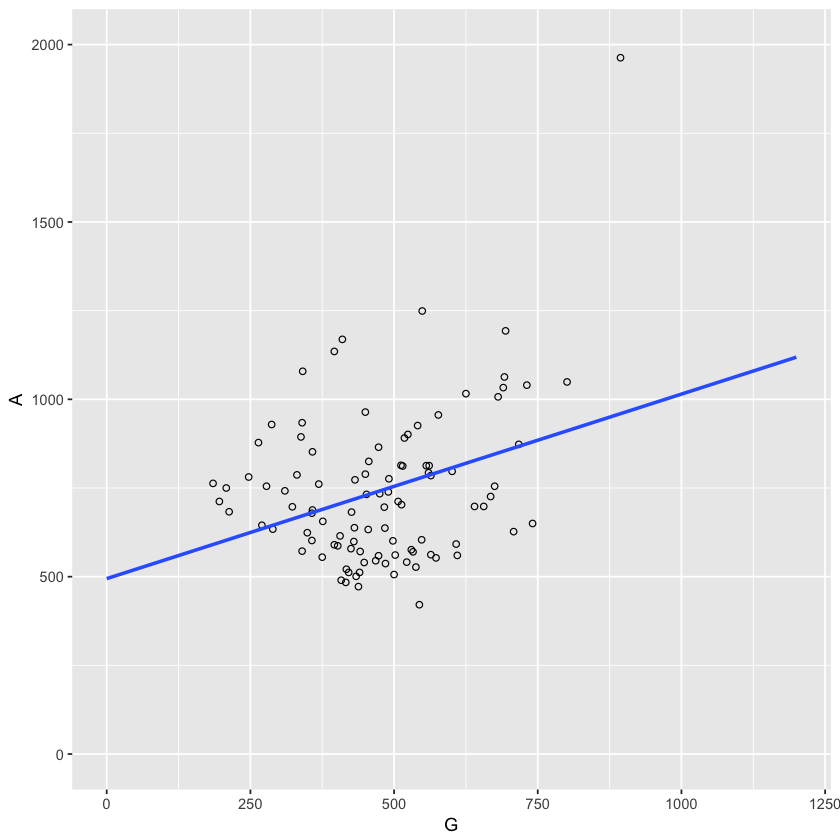

In [32]:
# plot(A ~ G, data=Dataset, main="NHL")
# abline(model)

ggplot(Dataset, aes(x=G, y=A)) + geom_point(shape=1) + 
geom_smooth(method="lm", formula = y~x, se = FALSE, fullrange = TRUE) + xlim(0,1200) + ylim(0, 2000)

# Building and plotting the Linear model where line is forced through Wayne

In [33]:
model_2 = lm(I(A-1963) ~ I(G-894) + 0, data = Dataset)
summary(model_2)


Call:
lm(formula = I(A - 1963) ~ I(G - 894) + 0, data = Dataset)

Residuals:
   Min     1Q Median     3Q    Max 
-902.2 -333.4 -145.4  103.3  703.4 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 894)   2.6847     0.0853   31.48   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 375.7 on 99 degrees of freedom
Multiple R-squared:  0.9091,	Adjusted R-squared:  0.9082 
F-statistic: 990.7 on 1 and 99 DF,  p-value: < 2.2e-16


Plotting the model

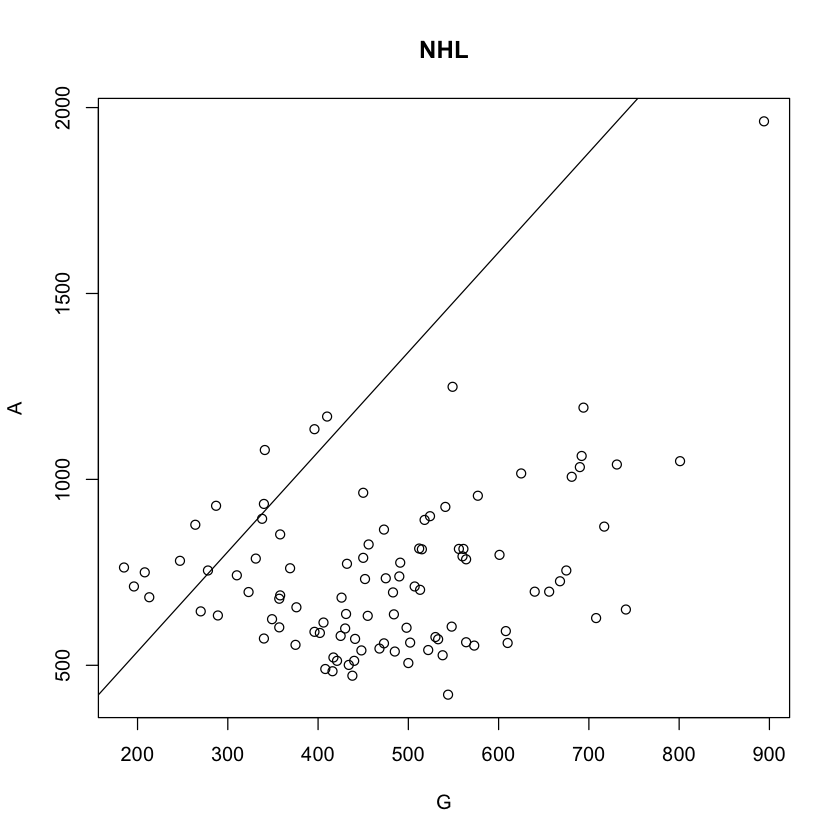

In [34]:
plot(A ~ G, data=Dataset, main="NHL")
abline(model_2)

Let us now calculate the slope and the intercept of the model which we will use to plot the line through the point.

In [35]:
slope = coef(model_2)
slope
# y = mx+c
c = 1963 - (slope*894)
c

I(G - 894) 
  2.684662

I(G - 894) 
 -437.0882

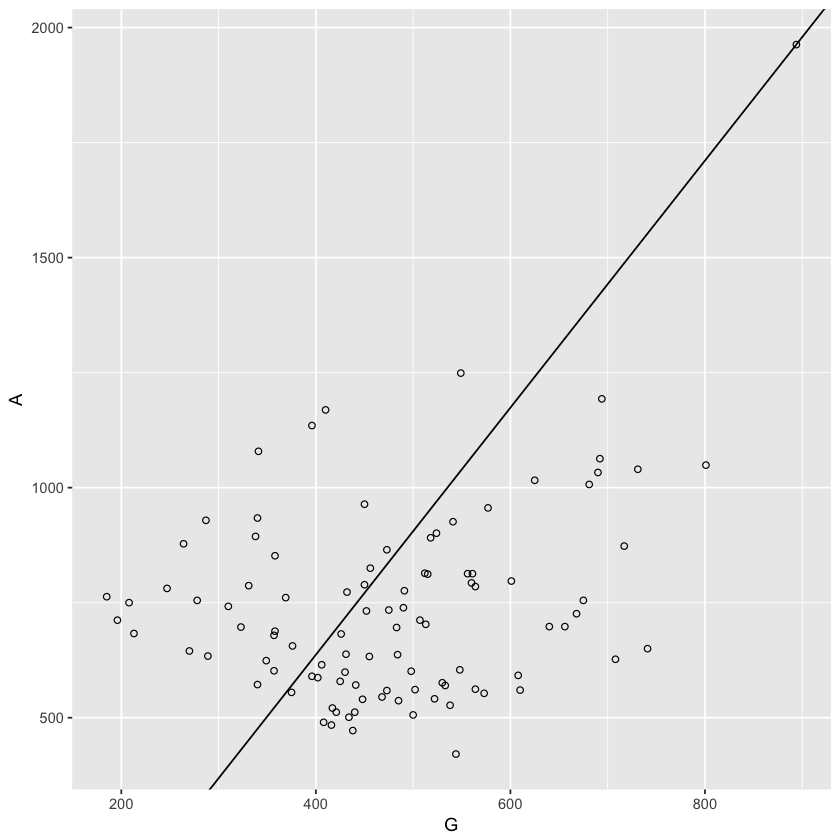

In [36]:
ggplot(Dataset, aes(x=G, y=A)) + geom_point(shape=1) + geom_abline(intercept = c, slope = slope)
# plot(A ~ G, data=Dataset, main="NHL")
# abline(a = c, b = slope)

# Building and plotting the Linear model where line is forced through Patrick

Adding the new player.

In [37]:
player <- c(285,462)
Data_rel <- subset(Dataset,select=G:A)
ncol(Data_rel)
nrow(Data_rel)
head(Data_rel)

[1] 2

[1] 100

G,A
894,1963
694,1193
801,1049
549,1249
731,1040
692,1063


In [38]:
Data_rel <- rbind(Data_rel, player)
nrow(Data_rel)

[1] 101

Building the model.

In [39]:
model_3 = lm(I(A-462) ~ I(G-285) + 0, data = Dataset)
summary(model_3)


Call:
lm(formula = I(A - 462) ~ I(G - 285) + 0, data = Dataset)

Residuals:
    Min      1Q  Median      3Q     Max 
-337.54 -114.18   41.51  168.29  803.74 

Coefficients:
           Estimate Std. Error t value Pr(>|t|)    
I(G - 285)  1.14493    0.09874    11.6   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 231.8 on 99 degrees of freedom
Multiple R-squared:  0.5759,	Adjusted R-squared:  0.5716 
F-statistic: 134.5 on 1 and 99 DF,  p-value: < 2.2e-16


Plotting the model.

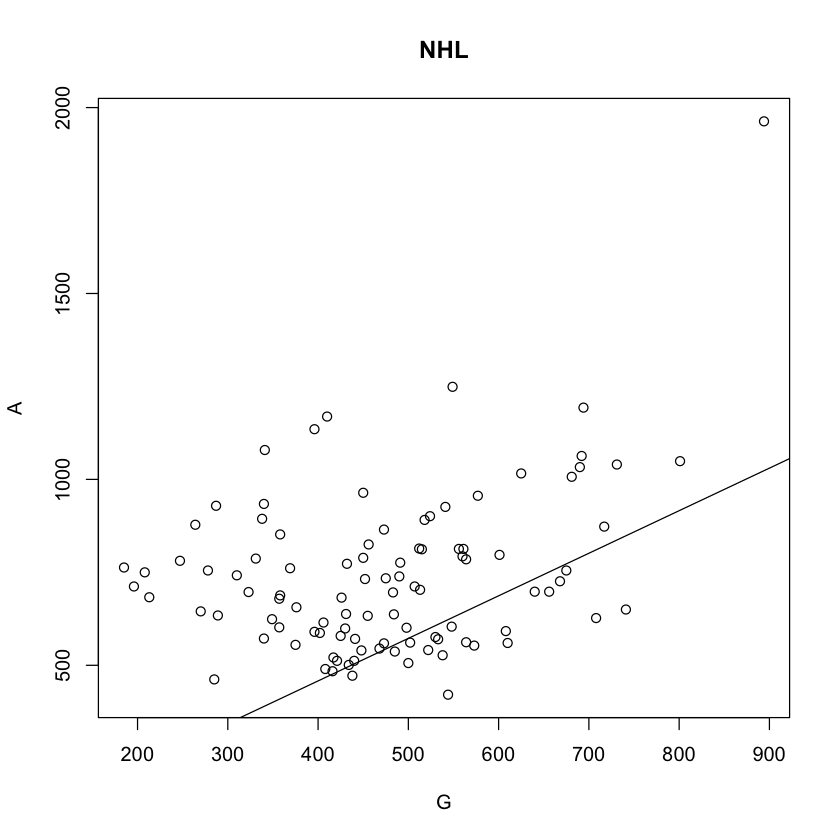

In [40]:
plot(A ~ G, data=Data_rel, main="NHL")
abline(model_3)

Calculating the slope and the intercept.

In [41]:
slope_1 = coef(model_3)
slope_1
# y = mx+c
c_1 = 462 - (slope_1*285)
c_1

I(G - 285) 
  1.144932

I(G - 285) 
  135.6943

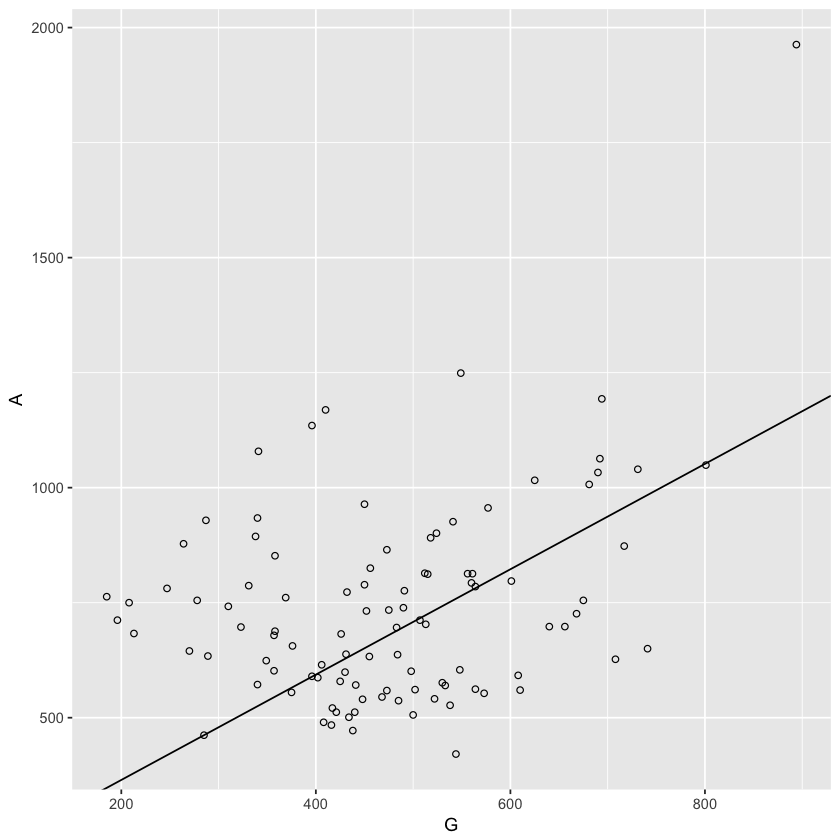

In [42]:
# plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
# abline(a = c_1, b = slope_1)
ggplot(Data_rel, aes(x=G, y=A)) + geom_point(shape=1) + geom_abline(intercept = c_1, slope = slope_1)

## Forcing the previous models to go through the Origin.

In [43]:
first_mod <- lm(A ~ G -1 , data = Data_rel)
summary(first_mod)


Call:
lm(formula = A ~ G - 1, data = Data_rel)

Residuals:
   Min     1Q Median     3Q    Max 
-447.3 -137.1    3.6  157.9  639.2 

Coefficients:
  Estimate Std. Error t value Pr(>|t|)    
G  1.48080    0.04976   29.76   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 246.7 on 100 degrees of freedom
Multiple R-squared:  0.8985,	Adjusted R-squared:  0.8975 
F-statistic: 885.4 on 1 and 100 DF,  p-value: < 2.2e-16


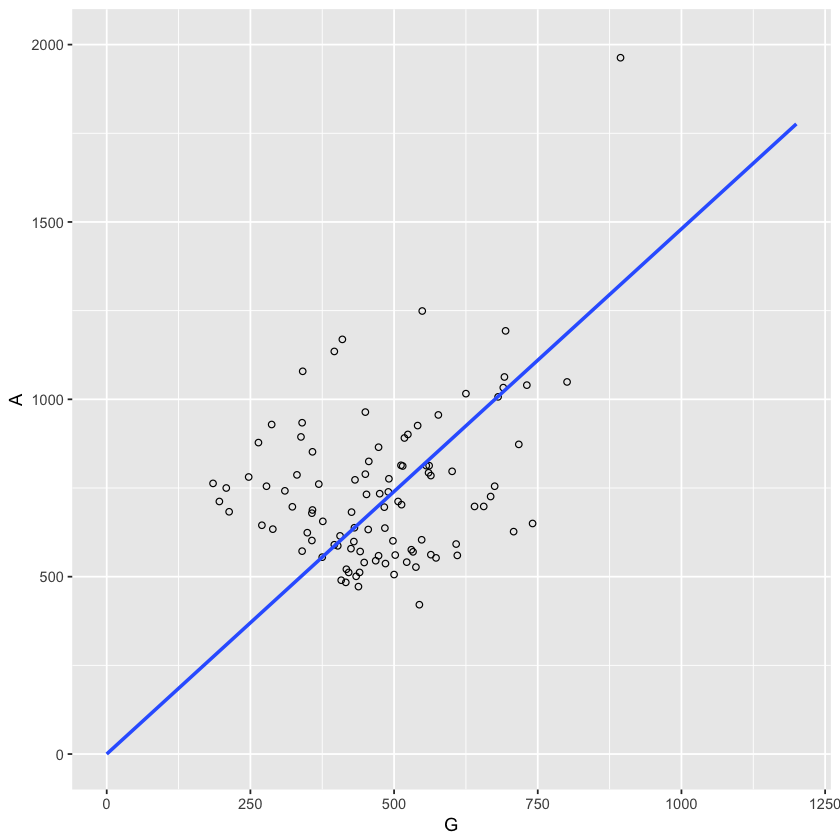

In [44]:
ggplot(Dataset, aes(x=G, y=A)) + geom_point(shape=1) +
geom_smooth(method="lm", formula = y ~ x -1 , se = FALSE, fullrange = TRUE) + xlim(0,1200) + ylim(0, 2000)

now we need to force the line through the origin and point.
In the following lines i tried using offset to achive this, based on this question asked on stack overflow.
http://stackoverflow.com/questions/16920628/use-of-offset-in-lm-regression-r

in the question the person tried to pass the LM through the point as well.

We can easily draw the line from origin to the point using abline because we know the slope of the line.
We can't however find the R squared and the p rates from them, which the next two plots will demonstrate.

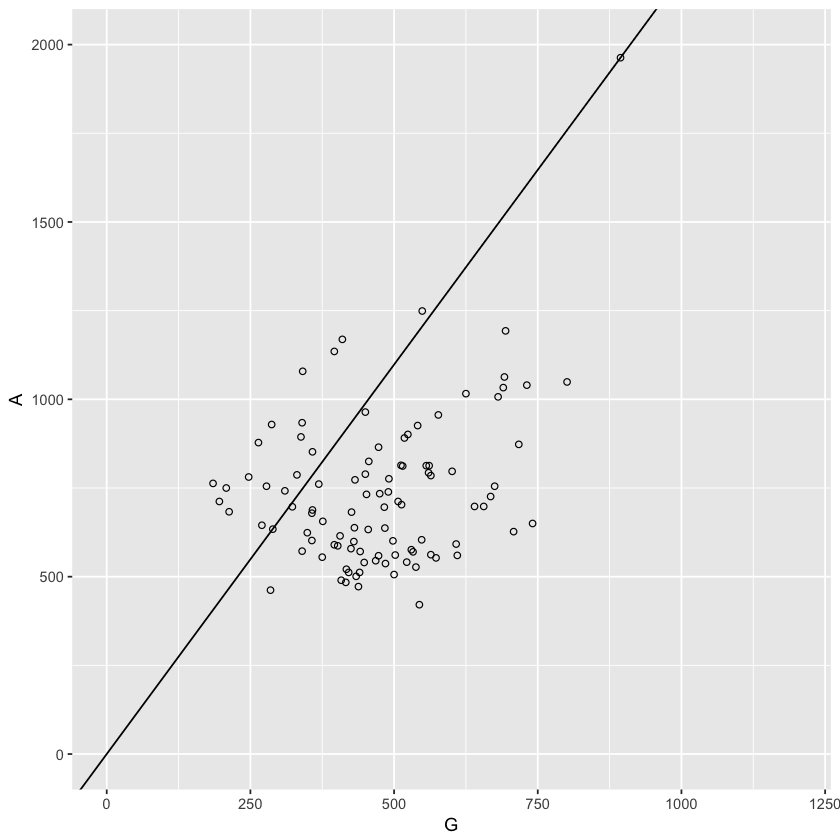

In [45]:
ggplot(Data_rel, aes(x=G, y=A)) + geom_point(shape=1) + geom_abline(intercept = 0, slope = (1963/894)) + 
xlim(0,1200) + ylim(0, 2000)

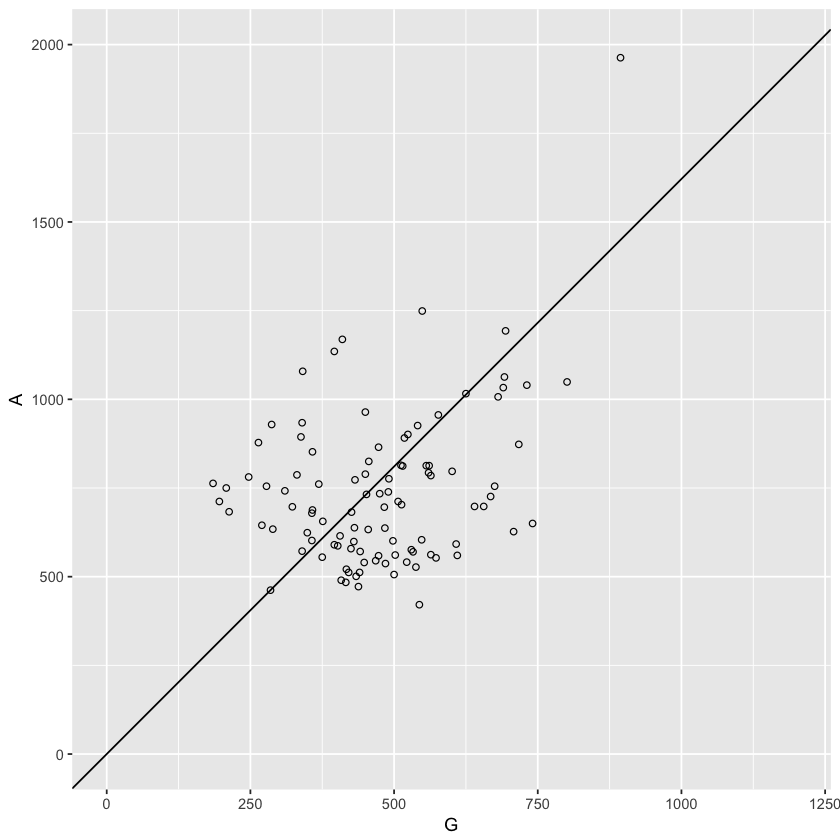

In [46]:
ggplot(Data_rel, aes(x=G, y=A)) + geom_point(shape=1) + geom_abline(intercept = 0, slope = (462/285)) + 
xlim(0,1200) + ylim(0, 2000)

This however does not give us any way of finding out the R squared and the p Values. Now I've attempted using the offset as described in the stack overflow question 
http://stackoverflow.com/questions/16920628/use-of-offset-in-lm-regression-r

Attempting to force lm through Patrick and the origin

In [47]:
x0 <- 285 

Data_rel$o <- 462

Goal_reg <- lm(A ~ I(G-x0)-1, offset=o, data = Data_rel)

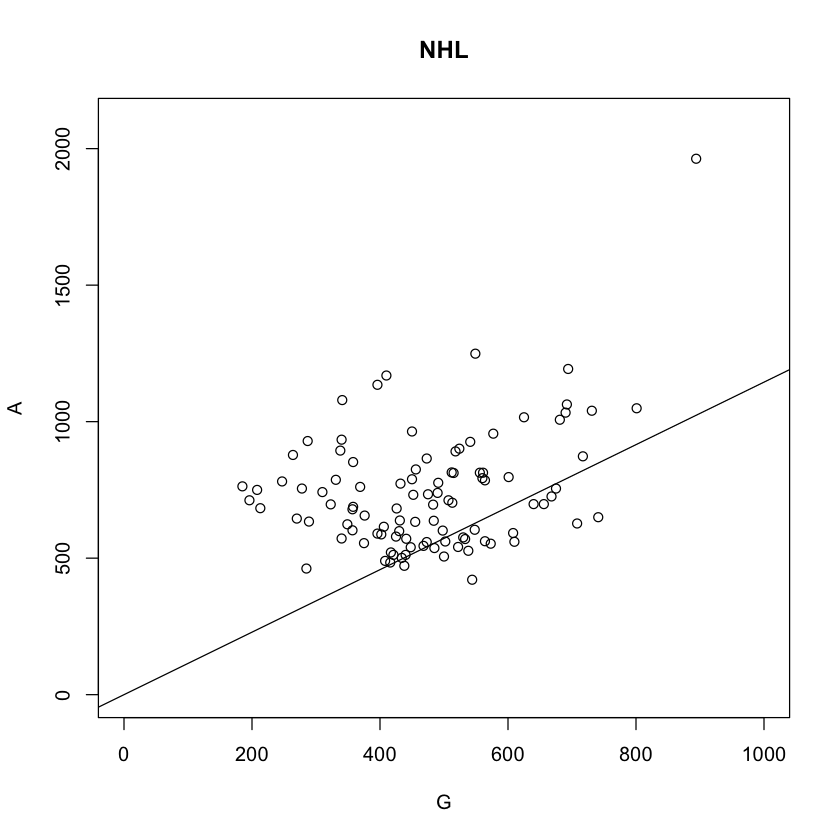

In [48]:
plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
abline(Goal_reg)

Attempting to force lm through Wayne and the origin.

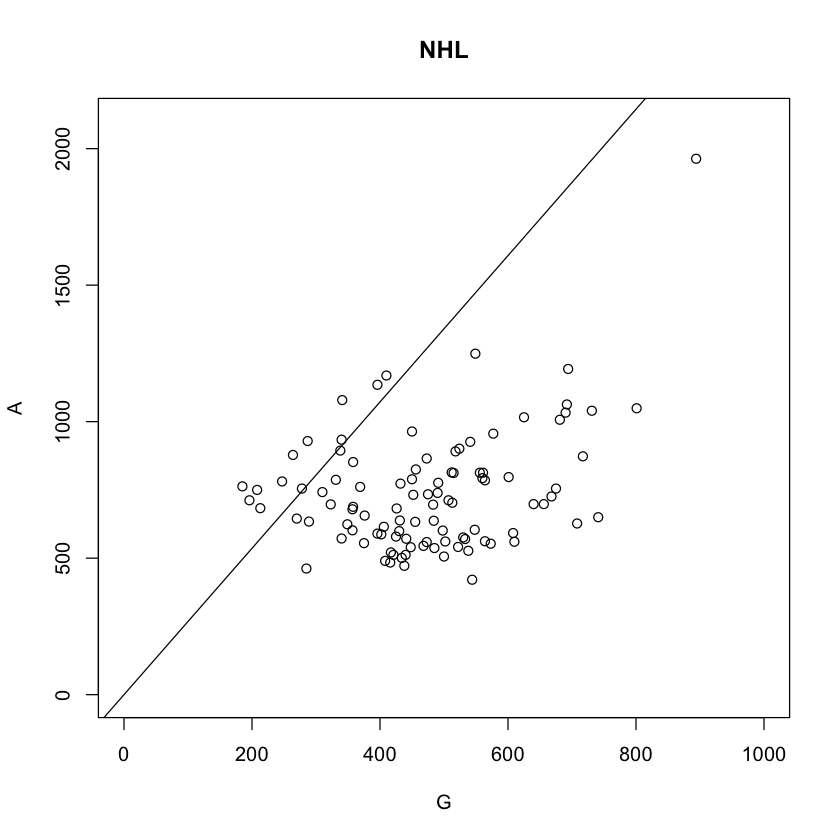

In [49]:
x0 <- 894 

Data_rel$k <- 1963

Goal_reg_1 <- lm(A ~ I(G-x0)-1, offset=k, data = Data_rel)

plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
abline(Goal_reg_1)

Even using Offset didn't give us the graphs that we wanted. We can see that the lines still do not pass through the players even though they pass through the origin. Now I Attempt to find the slope of the line passing through Wayne and use the intercept of create a new model. 

In [50]:
new_model <- lm(I(A-1963)~I(G-894), data = Data_rel)
summary(new_model)
slope_3 <- coef(new_model)
slope_3


Call:
lm(formula = I(A - 1963) ~ I(G - 894), data = Data_rel)

Residuals:
    Min      1Q  Median      3Q     Max 
-355.97 -175.12   -8.92  126.23  997.75 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -997.7481    66.0317 -15.110  < 2e-16 ***
I(G - 894)     0.5380     0.1492   3.605 0.000491 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 206.8 on 99 degrees of freedom
Multiple R-squared:  0.116,	Adjusted R-squared:  0.1071 
F-statistic:    13 on 1 and 99 DF,  p-value: 0.0004909


(Intercept)   I(G - 894) 
-997.7480743    0.5379576

Creating new model with intercept.

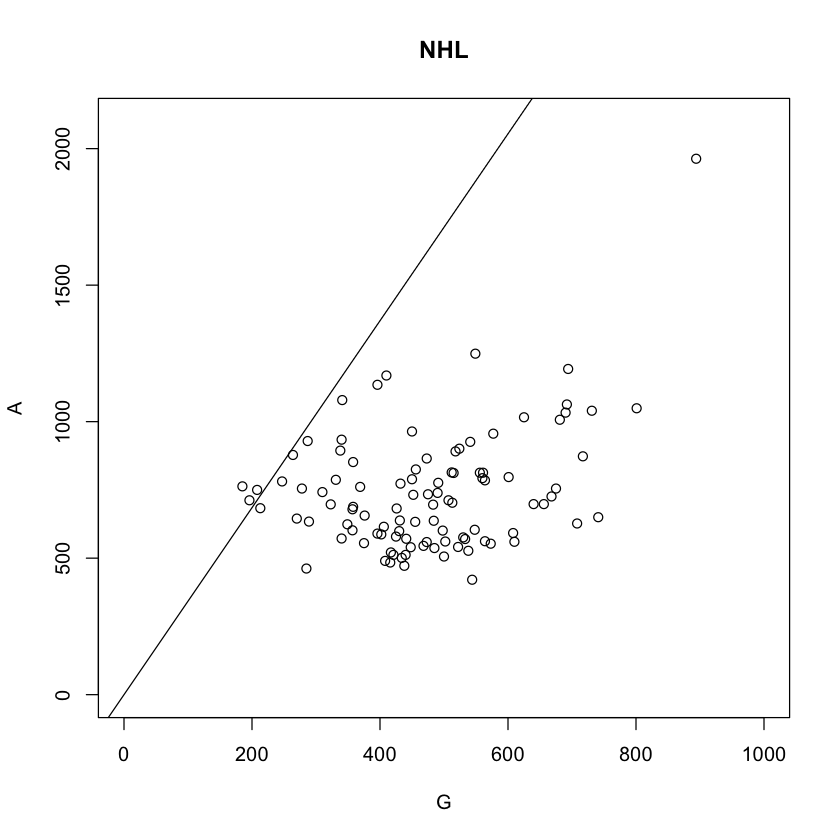

In [51]:
new_model_1 <- lm(I(A + 997.748074255969)~I(G) + 0, data = Data_rel)

plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
abline(new_model_1)

Even this isn't correct. Now I try trial and error.

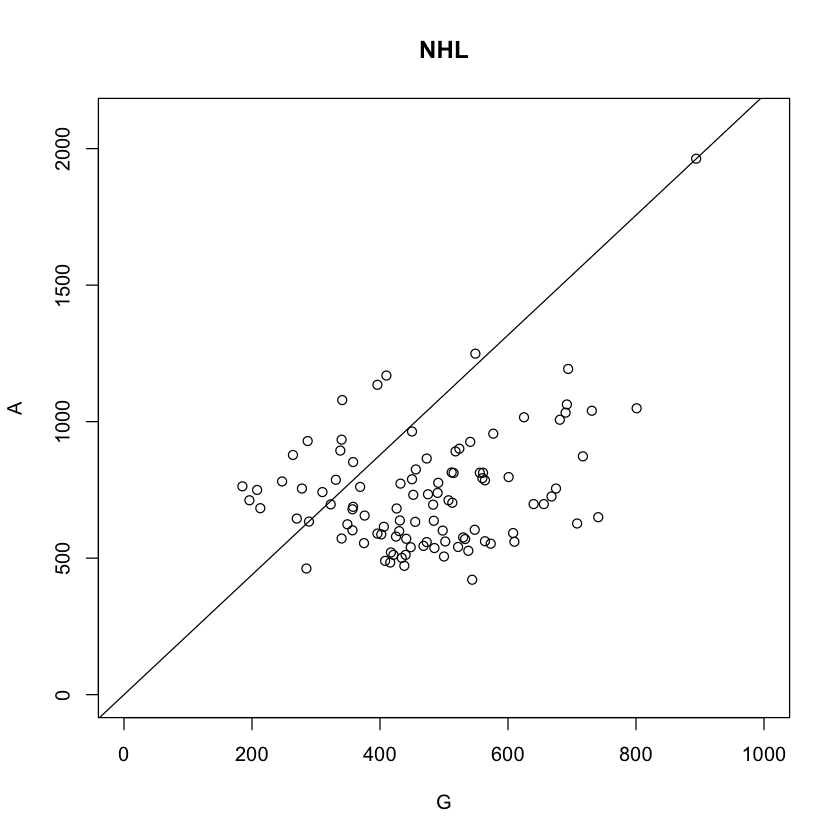

In [52]:
Trial_1 <- lm(I(A + 367)~I(G) + 0, data = Data_rel)

plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
abline(Trial_1)

repeating the same for Patrick.

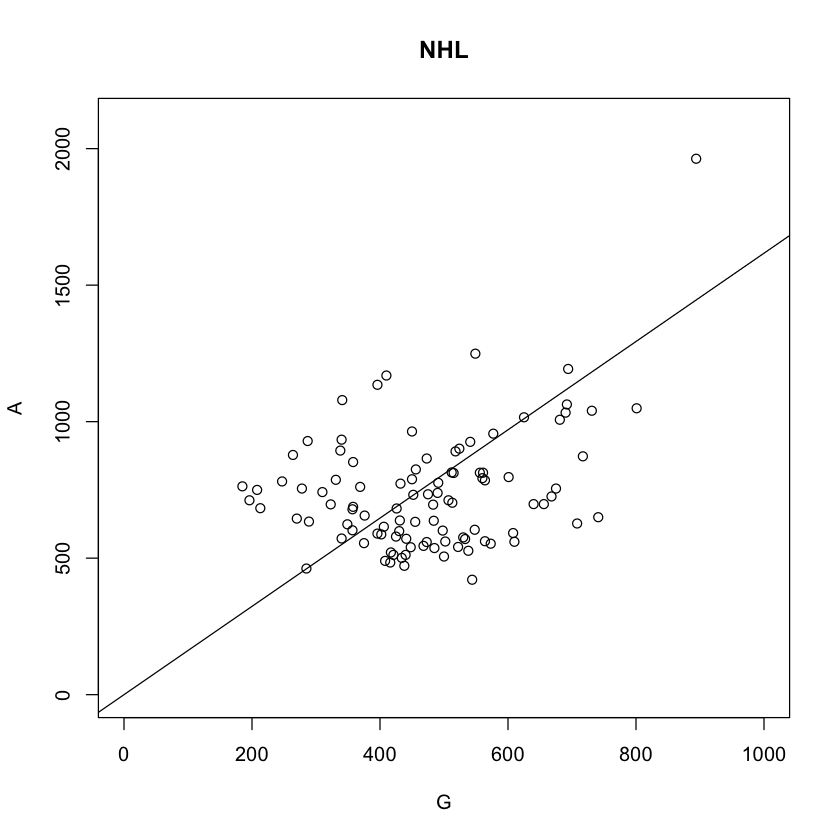

In [53]:
Trial_2 <- lm(I(A + 70)~I(G) + 0, data = Data_rel)

plot(A ~ G, data=Data_rel, main="NHL", xlim = c(0,1000), ylim = c(0,2100))
abline(Trial_2)

In [54]:
summary(Trial_1)


Call:
lm(formula = I(A + 367) ~ I(G) + 0, data = Data_rel)

Residuals:
    Min      1Q  Median      3Q     Max 
-609.68 -120.97   30.33  224.86  723.88 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  2.19525    0.06365   34.49   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 315.5 on 100 degrees of freedom
Multiple R-squared:  0.9225,	Adjusted R-squared:  0.9217 
F-statistic:  1190 on 1 and 100 DF,  p-value: < 2.2e-16


In [55]:
summary(Trial_2)


Call:
lm(formula = I(A + 70) ~ I(G) + 0, data = Data_rel)

Residuals:
    Min      1Q  Median      3Q     Max 
-478.25 -130.81   13.99  170.13  597.58 

Coefficients:
     Estimate Std. Error t value Pr(>|t|)    
I(G)  1.61707    0.05206   31.06   <2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 258 on 100 degrees of freedom
Multiple R-squared:  0.9061,	Adjusted R-squared:  0.9052 
F-statistic: 964.9 on 1 and 100 DF,  p-value: < 2.2e-16


Recording all the values of R Square and p values in a Dataframe.

In [56]:
names <- c("Original", "Through Wayne", "Through Patrick", "Original_origin", "Wayne_Origin", "Patrick_Origin")
R <- c(0.09913, 0.9082, 0.5716, 0.8975, 0.9217, 0.9052)
p <- c(0.0008317, 2.2e-16, 2.2e-16, 2.2e-16, 2.2e-16, 2.2e-16)

final <- data.frame(names,R,p)
final

names,R,p
Original,0.09913,8.317e-04
Through Wayne,0.90820,2.200e-16
Through Patrick,0.57160,2.200e-16
Original_origin,0.89750,2.200e-16
Wayne_Origin,0.92170,2.200e-16
Patrick_Origin,0.90520,2.200e-16


Higher value of R sqauare results in the problem of overfitting.